# **Website of The Grocery Store Chain**
___________________________


### **Experimentation and A/B Testing Project**
- You are an analyst for a large grocery chain.
- One of your company’s goals is to drive more customers to download our mobile app and register for the loyalty program.
- Your manager is curious if changing the link to a button of the app store will improve the user’s ability to download the app.
- Your manager asks you to create an A/B testing plan for changing the link to a button of the app store with the expectation it will the user’s interest to download the app.

### **Data Quality**

#### Import Data

First, we must import the data.
- Grocery website is stord in `.csv` named `grocerywebsiteabtestdata.csv`
- Import data into python with `pd.read_csv(...)` to start analysis

In [1]:
#load data
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt

In [2]:
#initialization filename
filename = "grocerywebsiteabtestdata.csv"

#import data
data = pd.read_csv(filename)

#display 10 top rows of the data
data.head(10)

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag
0,1,39.13.114.2,1,2,0
1,2,13.3.25.8,1,1,0
2,3,247.8.211.8,1,1,0
3,4,124.8.220.3,0,3,0
4,5,60.10.192.7,0,2,0
5,6,23.5.199.2,1,3,0
6,7,195.12.126.2,1,1,0
7,8,97.6.126.6,0,3,1
8,9,93.10.165.4,1,1,0
9,10,180.3.76.4,1,1,0


- There are 5 column (`RecordID`, `IP Address`, `LoggedInFlag`, `ServerID`, `VisitPageFlag`)
- `RecordID` : identifier of the row of data
- `IP Address` : address of the user, who is visiting website
- `LoggedInFlag` : 1 - when user has an account and logged in
- `ServerID` : one of the servers user was routed through
- `VisitPageFlag` : 1 - when user clicked on the loyalty program page

In [3]:
#overview data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184588 entries, 0 to 184587
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   RecordID       184588 non-null  int64 
 1   IP Address     184588 non-null  object
 2   LoggedInFlag   184588 non-null  int64 
 3   ServerID       184588 non-null  int64 
 4   VisitPageFlag  184588 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 7.0+ MB


In [4]:
#dimension of data
data.shape

(184588, 5)

In [5]:
data.describe()

,RecordID,LoggedInFlag,ServerID,VisitPageFlag
count,184588.000000,184588.000000,184588.000000,184588.000000
mean,92294.500000,0.503657,1.999691,0.058184
std,53286.110082,0.499988,0.816719,0.234091
min,1.000000,0.000000,1.000000,0.000000
25%,46147.750000,0.000000,1.000000,0.000000
50%,92294.500000,1.000000,2.000000,0.000000
75%,138441.250000,1.000000,3.000000,0.000000
max,184588.000000,1.000000,3.000000,1.000000


#### Missing Value

In [6]:
#checking missing value
data.isna().sum()

RecordID         0
IP Address       0
LoggedInFlag     0
ServerID         0
VisitPageFlag    0
dtype: int64

- There is no missing value.

#### Uniqueness

An IP Address may have visited the page more than once. So, we must to check duplicate data on IP Address.

In [7]:
#checking duplicate data 
data.duplicated(['IP Address']).sum()

85072

In [8]:
#droping duplicates data
data.drop_duplicates(subset='IP Address', inplace=True)
data.shape

(99516, 5)

- Now, we have 99516 total records with no duplicates and data ready for analysis.

In [9]:
#display 10 top rows of the data
data.head(10)

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag
0,1,39.13.114.2,1,2,0
1,2,13.3.25.8,1,1,0
2,3,247.8.211.8,1,1,0
3,4,124.8.220.3,0,3,0
4,5,60.10.192.7,0,2,0
5,6,23.5.199.2,1,3,0
6,7,195.12.126.2,1,1,0
7,8,97.6.126.6,0,3,1
8,9,93.10.165.4,1,1,0
9,10,180.3.76.4,1,1,0


#### Distribution of Data

Split the dataset into `Control` and `Treatment` groups.

In [10]:
#length of ServerID when value 1
len(data[data['ServerID']==1])

33229

In [11]:
#length of ServerID when value 2
len(data[data['ServerID']==2])

33105

In [12]:
#length of ServerID when value 3
len(data[data['ServerID']==3])

33182

In [13]:
#compare each ServerID with VisitPageFlag
serverID_with_visitPage = pd.crosstab(data["ServerID"], data['VisitPageFlag'])
serverID_with_visitPage

VisitPageFlag,0,1
ServerID,,
1,30938,2291
2,31359,1746
3,31461,1721


We will set ServerID = 1 as `Treatment` Group and ServerID = 2 and 3 as `Control` Group

In [14]:
data['Group'] = np.where(data['ServerID'] == 1, 'Treatment', 'Control')
data.head()

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag,Group
0,1,39.13.114.2,1,2,0,Control
1,2,13.3.25.8,1,1,0,Treatment
2,3,247.8.211.8,1,1,0,Treatment
3,4,124.8.220.3,0,3,0,Control
4,5,60.10.192.7,0,2,0,Control


In [17]:
#length of Control Group
n_control = len(data[data['Group']=='Control'])
n_control

66287

In [18]:
#length of Treatment Group
n_treatment = len(data[data['Group']=='Treatment'])
n_treatment

33229

In [19]:
#find control group that is CTR
data_control_ctr = data[(data['VisitPageFlag'] == 1) & (data['Group'] == 'Control')]

#length of CTR on control group
n_control_ctr = len(data_control_ctr)
n_control_ctr

3467

In [20]:
#find treatment group that is CTR
data_treatment_ctr = data[(data['VisitPageFlag'] == 1) & (data['Group'] == 'Treatment')]

#length of CTR on treatment group
n_treatment_ctr = len(data_treatment_ctr)
n_treatment_ctr

2291

In [21]:
#comparing the Control and Treatment Group on VisitPageFlag
group_with_visitPage = pd.crosstab(data['Group'], data['VisitPageFlag'])
group_with_visitPage

VisitPageFlag,0,1
Group,,
Control,62820,3467
Treatment,30938,2291


Finally, calculate CTR on each group

In [22]:
#CTR control group
ctr_control = n_control_ctr / n_control
ctr_control

0.05230286481512212

In [23]:
#CTR treatment group
ctr_treatment = n_treatment_ctr / n_treatment
ctr_treatment

0.0689458003551115

On Visualization

C:\Users\UYUN\AppData\Local\Temp\ipykernel_12304\3857991313.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=["Control", "Treatment"], fontsize=14)


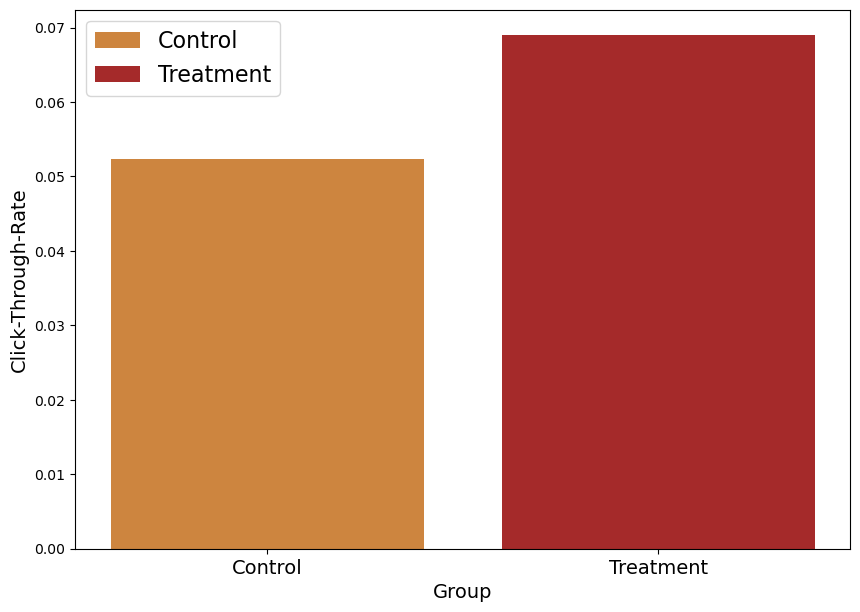

In [25]:
#compare visualization CTR each variant
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))

#make plot
ax.bar("Control", ctr_control, color="peru", label="Control")
ax.bar("Treatment", ctr_treatment, color="brown", label="Treatment")

#styling plot
ax.set_ylabel("Click-Through-Rate", fontsize=14)
ax.set_xlabel("Group", fontsize=14)
ax.set_xticklabels(labels=["Control", "Treatment"], fontsize=14)
ax.legend(fontsize=16)
plt.show()

#